In [1]:
#Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet



In [2]:
#Fetching and inspecting data
df=pd.read_excel("C:/Users/henry/Documents/HK Practice Projects/BI Analyst Case Study/Data/BI_Analyst_Case_Study_Data.xlsx",sheet_name=None)

sheet_names=list(df.keys())

Disbursements=df[sheet_names[0]]
Repayments=df[sheet_names[1]]

print(Disbursements.head())
print(Repayments.head())

print(Disbursements.info())
print(Repayments.info())


                                         customer_id  disb_date   tenure  \
0  91810ca1aa097db79f050f38e9946fa5482b4e28c925e2... 2024-03-19  14 days   
1  42ca06e6fe1ff9803e82a5c20184671b54090e488f78d6... 2024-03-19   7 days   
2  b23747f53af805e18ad16a4ef235b6642d88f9134644ff... 2024-03-19   7 days   
3  1bd32f9b083fc6ddfffd65730fbfa66654fa76a19b0b0e... 2024-03-19  14 days   
4  e7cfbaa97ba7702c52df5f1dddba54bd26923ebad945f1... 2024-03-19   7 days   

                        account_num  loan_amount  loan_fee  
0  3O66YENWELA6E2H1R9YLX0LDZNOMNHD4          360      43.2  
1  6XWHXKKR1W2HIA8I0V75PZFZBXUUGSVO           70       7.0  
2  OCGK3RJZ91A999VXD4VB3LATPSME3J5L         3500     350.0  
3  9X3Q682DOR7927IMMJLFHBGP0RP7YF5C         3500     420.0  
4  AQH88NNF8S76MGJL4J4ULEAE18O0KLWH          120      12.0  
                         date_time  \
0  27-JUN-24 07.16.36.000000000 AM   
1  27-JUN-24 05.26.50.000000000 PM   
2  27-JUN-24 06.45.40.000000000 PM   
3  27-JUN-24 01.24.57.000

In [3]:
#Date conversion,indexing and sorting

# Convert to datetime 
Disbursements['disb_date'] = pd.to_datetime(Disbursements['disb_date'])
Repayments['date_time'] = pd.to_datetime(Repayments['date_time'],
format="%d-%b-%y %I.%M.%S.%f %p", errors='coerce')

# Sorting
Disbursements = Disbursements.sort_values('disb_date')
Repayments    = Repayments.sort_values('date_time')

# Indexing
Disbursements = Disbursements.set_index('disb_date', drop=False)
Repayments    = Repayments.set_index('date_time', drop=False)

print(Disbursements.head())
print(Repayments.head())


                                                  customer_id  disb_date  \
disb_date                                                                  
2024-01-01  f3074d4e26422a5148447b455b576f1076bc1cd3e82fc4... 2024-01-01   
2024-01-01  2602a849fc6380938620e10d6b50b6e2657cda9c1f5d9c... 2024-01-01   
2024-01-01  c76ef9f323ed2ae1f8a290af54e1bbd332a2e378db6bd4... 2024-01-01   
2024-01-01  bd0e2a9e1b334cccb275826f5e9181e2c9dcf2d0ab8bb4... 2024-01-01   
2024-01-01  be59a1237f24af5efb0b7b8dcb38752d1e7d9ce9f30e6b... 2024-01-01   

             tenure                       account_num  loan_amount  loan_fee  
disb_date                                                                     
2024-01-01   7 days  65094EDUHBUXN9FQHAW118M6U1YS4G0S          590      59.0  
2024-01-01  14 days  KR5KNBEM8GMDQRR7MIBTRPSW2FA1W3BL          100      12.0  
2024-01-01  14 days  R74WLZ6EWE6IVDPJ1Z18U3Z53QWXET3Q          700      84.0  
2024-01-01   7 days  L9XVK620RD8S5HH8KKUR5SEMDGRTR1P9          100      

disb_date
2024-01-01     72350
2024-01-02    111340
2024-01-03     86680
2024-01-04    115440
2024-01-05     94365
Freq: D, Name: loan_amount, dtype: int64
date_time
2024-01-01     61656.97
2024-01-02    119585.17
2024-01-03    103259.32
2024-01-04    111680.98
2024-01-05    108752.41
Freq: D, Name: amount, dtype: float64


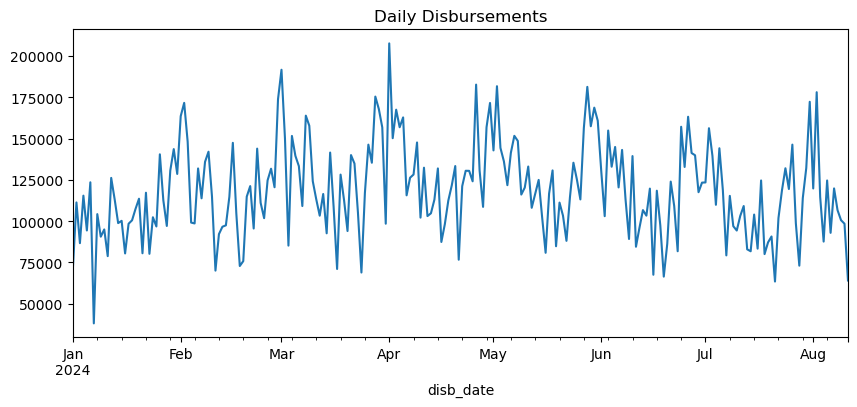

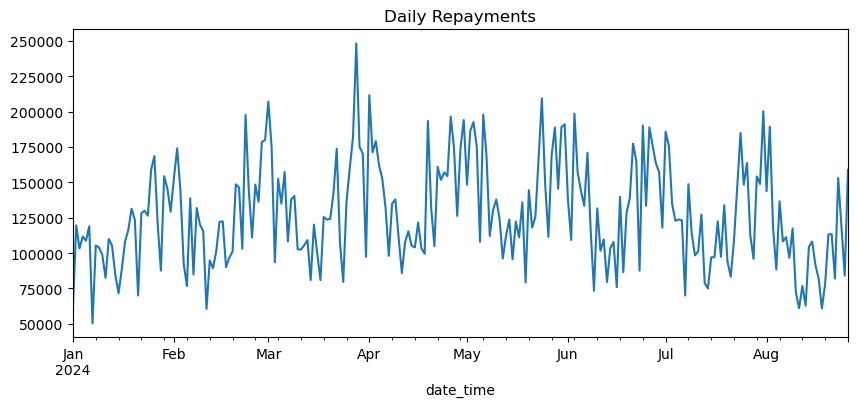

In [4]:
#Forecasting time series

#Daily aggregated disbursement amounts
daily_disb = Disbursements.resample('D')['loan_amount'].sum()
daily_disb = daily_disb.fillna(0)
print(daily_disb.head())

#Daily aggregated repayment amounts
daily_rep = Repayments.resample('D')['amount'].sum()
daily_rep = daily_rep.fillna(0)
print(daily_rep.head())

#plots
daily_disb.plot(figsize=(10,4), title="Daily Disbursements")
plt.show()

daily_rep.plot(figsize=(10,4), title="Daily Repayments")
plt.show()




C:\Users\henry\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\henry\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


2024-08-12    90176.946606
2024-08-13    93545.299207
2024-08-14    91973.087577
2024-08-15    90282.146392
2024-08-16    91210.787558
2024-08-17    90923.999183
2024-08-18    91170.692985
2024-08-19    90956.450745
2024-08-20    91095.545574
2024-08-21    91005.004720
2024-08-22    91068.848786
2024-08-23    91024.183963
2024-08-24    91054.767577
2024-08-25    91033.750343
2024-08-26    91048.276051
2024-08-27    91038.251118
2024-08-28    91045.159648
2024-08-29    91040.396361
2024-08-30    91043.681770
2024-08-31    91041.416081
2024-09-01    91042.978407
2024-09-02    91041.901035
2024-09-03    91042.644001
2024-09-04    91042.131653
2024-09-05    91042.484966
2024-09-06    91042.241321
2024-09-07    91042.409338
2024-09-08    91042.293474
2024-09-09    91042.373374
2024-09-10    91042.318275
Freq: D, Name: predicted_mean, dtype: float64


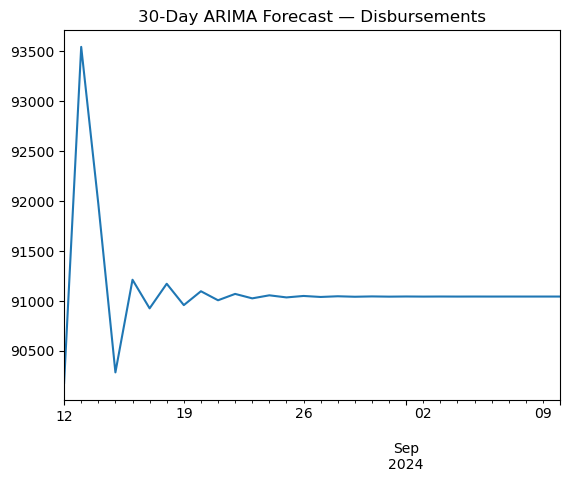

In [6]:
#30 day Forecast for Disbursements
model = ARIMA(daily_disb, order=(3,1,2))
fit = model.fit()

forecast_arima = fit.forecast(30)   
print(forecast_arima)

forecast_arima.plot(title="30-Day ARIMA Forecast — Disbursements")
plt.show()


In [9]:
print(Repayments.columns)

Index(['date_time', 'customer_id', 'amount', 'rep_month', 'repayment_type'], dtype='object')


14:23:49 - cmdstanpy - INFO - Chain [1] start processing
14:24:01 - cmdstanpy - INFO - Chain [1] done processing


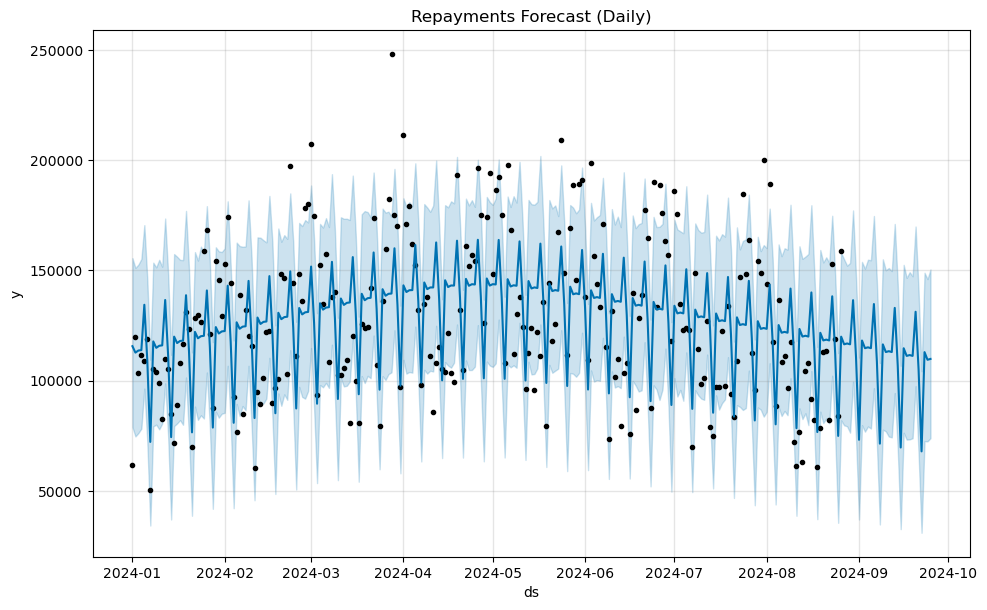

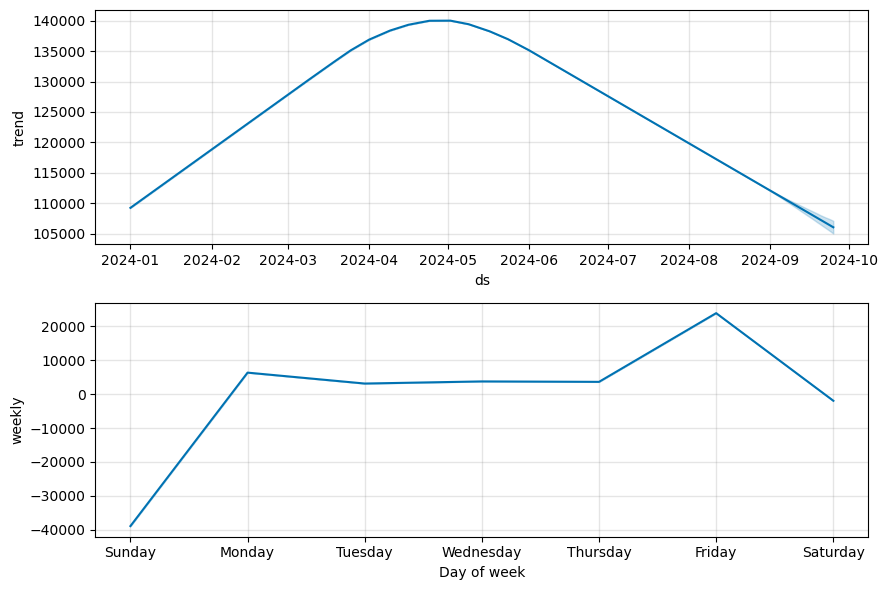

In [10]:
#30 day forecast for repayments
rep_prophet = Repayments[['date_time', 'amount']].copy()
rep_prophet = rep_prophet.rename(columns={
    'date_time': 'ds',
    'amount': 'y'
})

#Aggregating daily totals
rep_daily = rep_prophet.resample('D', on='ds').sum().reset_index()

model = Prophet()
model.fit(rep_daily)

#Forecasting
future = model.make_future_dataframe(periods=30, freq='D')
forecast = model.predict(future)

model.plot(forecast)
plt.title("Repayments Forecast (Daily)")
plt.show()

model.plot_components(forecast)
plt.show()



